In [3]:
!pip install tensorflow
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import tensorflow as tf
import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Dense, Dropout, Activation, Flatten, Lambda
from keras.utils.np_utils import to_categorical
import VariantCalling as vc
import numpy as np
import matplotlib.pyplot as plt

In [5]:
img_row, img_col = 101, 178
nb_epoch = 50
batch_size = 16
nb_filters = 24
nb_conv = 5
nb_pool = 5

Progress:  0.0%% completed. 	Computing alignment 0 of 10
[25.707089391934325, 28.455271899141692, 45.837638708923976]


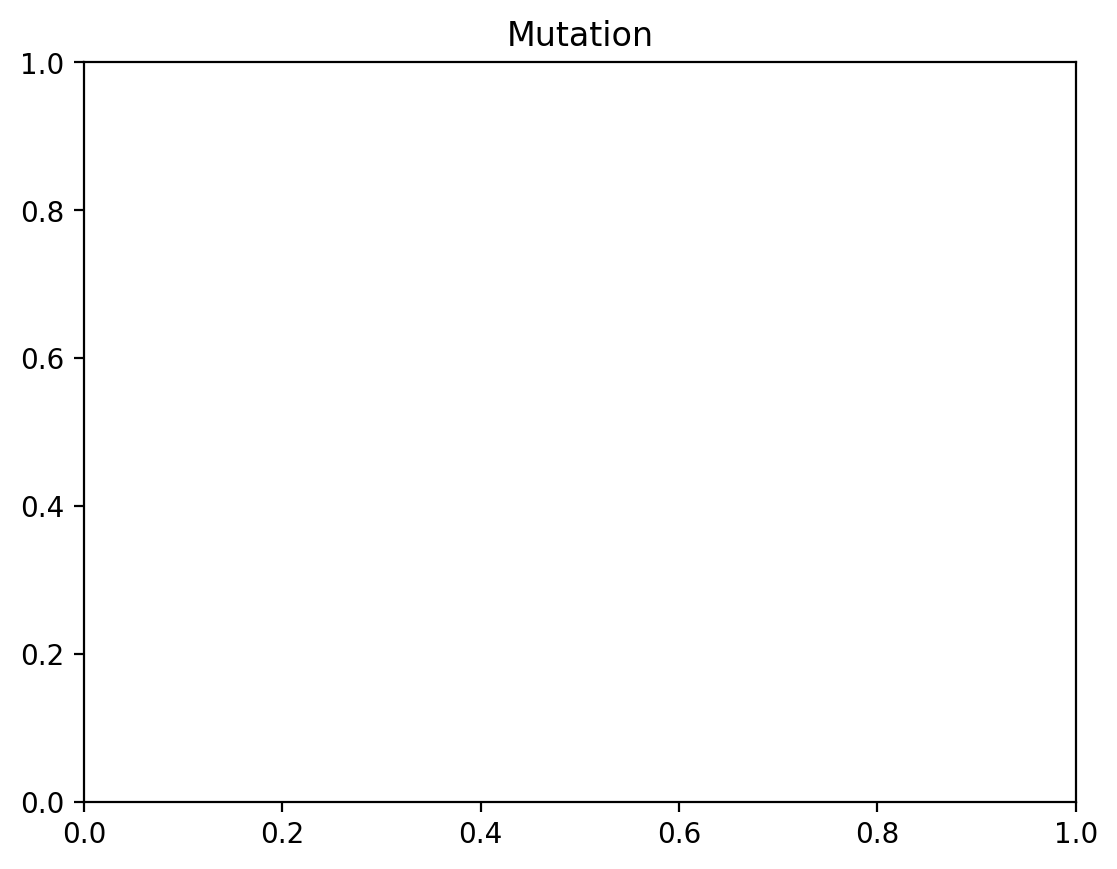

In [6]:
"""
This section to test ratio_gen, which is wrapper for alignments
"""
dg = vc.VariantCallingData()
alignments, prob_lists = dg.simulate_clones(10,100,0.01,0.01)
alignments_int = dg.char_to_int(alignments)
alignment_int = dg.char_to_int(alignments[0])
plt.rcParams['figure.dpi'] = 200
#alignment_idx = mutation_types.index(mutation_index)
plt.title("Mutation")
prob_lists = (np.array(prob_lists)*100).tolist()
print(prob_lists[0])

In [7]:
"""
This section to test ratio_gen, which is wrapper for alignments
"""
dg = vc.VariantCallingData()
alignments, prob_lists = dg.simulate_clones(10000,100,0.01,0.01)
prob_lists = (np.array(prob_lists)*100).tolist()


Progress:  0.0%% completed. 	Computing alignment 0 of 10000
Progress:  4.0%% completed. 	Computing alignment 400 of 10000
Progress:  8.0%% completed. 	Computing alignment 800 of 10000
Progress:  12.0%% completed. 	Computing alignment 1200 of 10000
Progress:  16.0%% completed. 	Computing alignment 1600 of 10000
Progress:  20.0%% completed. 	Computing alignment 2000 of 10000
Progress:  24.0%% completed. 	Computing alignment 2400 of 10000
Progress:  28.0%% completed. 	Computing alignment 2800 of 10000
Progress:  32.0%% completed. 	Computing alignment 3200 of 10000
Progress:  36.0%% completed. 	Computing alignment 3600 of 10000
Progress:  40.0%% completed. 	Computing alignment 4000 of 10000
Progress:  44.0%% completed. 	Computing alignment 4400 of 10000
Progress:  48.0%% completed. 	Computing alignment 4800 of 10000
Progress:  52.0%% completed. 	Computing alignment 5200 of 10000
Progress:  56.0%% completed. 	Computing alignment 5600 of 10000
Progress:  60.0%% completed. 	Computing alignmen

In [8]:
print(len(alignments[0]))
alignments = [dg._array_dup(i,101) for i in alignments]
print(len(alignments))
print(alignments[8].shape)
print(alignments[8])
alignments = dg.char_to_int(alignments)

101
10000
(2, 101, 178)
[[['T' 'G' 'T' ... 'A' 'C' 'T']
  ['T' 'G' 'T' ... 'A' 'C' 'T']
  ['T' 'G' 'T' ... 'A' 'C' 'T']
  ...
  ['T' 'G' 'T' ... 'A' 'A' 'T']
  ['T' 'G' 'T' ... 'A' 'C' 'T']
  ['T' 'G' 'T' ... 'A' 'C' 'T']]

 [['T' 'G' 'T' ... 'A' 'C' 'T']
  ['T' 'G' 'T' ... 'A' 'C' 'T']
  ['T' 'G' 'T' ... 'A' 'C' 'T']
  ...
  ['T' 'G' 'T' ... 'A' 'C' 'T']
  ['T' 'G' 'T' ... 'A' 'C' 'T']
  ['T' 'G' 'T' ... 'A' 'C' 'T']]]


In [9]:
rng = np.random.default_rng(seed=42) # use a fixed random generator so runs are consistent
idxs = np.arange(alignments.shape[0])

rng.shuffle(idxs)

split_idx = int(alignments.shape[0]*0.8)
train_alignments, valid_alignments = alignments[idxs[:split_idx]], alignments[idxs[split_idx:]]
train_prob_lists, valid_prob_lists = np.array(prob_lists)[idxs[:split_idx]], np.array(prob_lists)[idxs[split_idx:]]
#train_mutation_types, valid_mutation_types = mutation_types[idxs[:split_idx]], mutation_types[idxs[split_idx:]]
print(train_alignments.shape)
print(train_prob_lists.shape)

(8000, 2, 101, 178)
(8000, 3)


In [10]:
img_row = 101
img_col = 178
print(train_alignments.shape)
print(valid_alignments.shape)


train_alignments = train_alignments.reshape(train_alignments.shape[0], img_row, img_col, 2)
valid_alignments = valid_alignments.reshape(valid_alignments.shape[0], img_row, img_col, 2)

train_alignments = train_alignments.astype('float32')
valid_alignments = valid_alignments.astype('float32')

train_alignments /= 3
valid_alignments /= 3


(8000, 2, 101, 178)
(2000, 2, 101, 178)


In [11]:
model = Sequential()
model.add(Conv2D(nb_filters, nb_conv, nb_conv))
model.add(MaxPooling2D(pool_size = (nb_pool, nb_pool)))
model.add(Activation('relu'))
model.add(Conv2D(nb_filters, nb_conv, nb_conv,padding="same"))
model.add(MaxPooling2D(pool_size = (nb_pool, nb_pool),padding="same"))
model.add(Dropout(0.1))
model.add(Activation('relu'))
model.add(Conv2D(nb_filters, nb_conv, nb_conv,padding="same"))
model.add(MaxPooling2D(pool_size = (nb_pool, nb_pool),padding="same"))
model.add(Activation('relu'))
model.add(Conv2D(nb_filters, nb_conv, nb_conv,padding="same"))
model.add(MaxPooling2D(pool_size = (nb_pool, nb_pool),padding="same"))
model.add(Flatten())
model.add(Dense(16))
model.add(Dropout(0.1))
model.add(Activation('relu'))
model.add(Dense(16))
model.add(Dropout(0.1))
model.add(Activation('relu'))
#model.add(Dense(24))
#model.add(Dropout(0.2))
#model.add(Activation('relu'))
model.add(Dense(3))
model.add(Activation('softmax'))
model.add(Lambda(lambda x: x * 100))
model.compile(metrics=['mse'],loss='categorical_crossentropy',optimizer='adam')

In [12]:
trained_model = model.fit(train_alignments, train_prob_lists, batch_size = 64, epochs = 50,  verbose = 1, validation_data = (valid_alignments, valid_prob_lists))

Epoch 1/50
125/125 [==============================] - 15s 19ms/step - loss: 109.8321 - mse: 320.7378 - val_loss: 109.2528 - val_mse: 308.6316
Epoch 2/50
125/125 [==============================] - 1s 12ms/step - loss: 104.8069 - mse: 217.7934 - val_loss: 102.5258 - val_mse: 169.3247
Epoch 3/50
125/125 [==============================] - 1s 12ms/step - loss: 102.0754 - mse: 159.2556 - val_loss: 98.0611 - val_mse: 71.6368
Epoch 4/50
125/125 [==============================] - 1s 12ms/step - loss: 99.0426 - mse: 95.2109 - val_loss: 96.7220 - val_mse: 46.2977
Epoch 5/50
125/125 [==============================] - 1s 12ms/step - loss: 98.1285 - mse: 77.4245 - val_loss: 96.5459 - val_mse: 42.7737
Epoch 6/50
125/125 [==============================] - 1s 11ms/step - loss: 97.6971 - mse: 68.3892 - val_loss: 96.0710 - val_mse: 35.1891
Epoch 7/50
125/125 [==============================] - 1s 12ms/step - loss: 97.3981 - mse: 62.7432 - val_loss: 95.9541 - val_mse: 33.0437
Epoch 8/50
125/125 [==========

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 20, 35, 24)        1224      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 4, 7, 24)         0         
 )                                                               
                                                                 
 activation (Activation)     (None, 4, 7, 24)          0         
                                                                 
 conv2d_1 (Conv2D)           (None, 1, 2, 24)          14424     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 1, 1, 24)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 1, 1, 24)          0

In [14]:
with open('output.csv', 'w') as file:
    predict_array = model.predict(valid_alignments).tolist()
    for i in range(0, len(valid_prob_lists)):
        file.write("\nPredicted\n")
        file.write(str(predict_array[i]))
        file.write("\nActual\n")
        file.write(str(valid_prob_lists[i]))

63/63 [==============================] - 0s 4ms/step


        col_3D7    col_7G8    col_DD2
0     53.326626  17.632504  29.040871
1     46.930992  12.690335  40.378674
2     40.704247  11.239610  48.056145
3     30.182064  47.796242  22.021692
4      7.693780  72.055305  20.250914
...         ...        ...        ...
1995  10.638418  49.308922  40.052666
1996  71.019073  11.664656  17.316277
1997  40.898399  20.676607  38.424992
1998  27.969276  52.880333  19.150391
1999  12.385652  59.174366  28.439989

[2000 rows x 3 columns]
        col_3D7    col_7G8    col_DD2
0     52.992122  10.912313  36.095565
1     48.422317   5.754989  45.822694
2     41.120917   5.934885  52.944198
3     31.579276  45.556295  22.864430
4      7.657620  72.138891  20.203489
...         ...        ...        ...
1995  13.113719  46.819084  40.067197
1996  82.672964   3.804095  13.522941
1997  48.532440  11.646157  39.821403
1998  29.924106  48.452765  21.623129
1999  12.945773  60.483460  26.570766

[2000 rows x 3 columns]


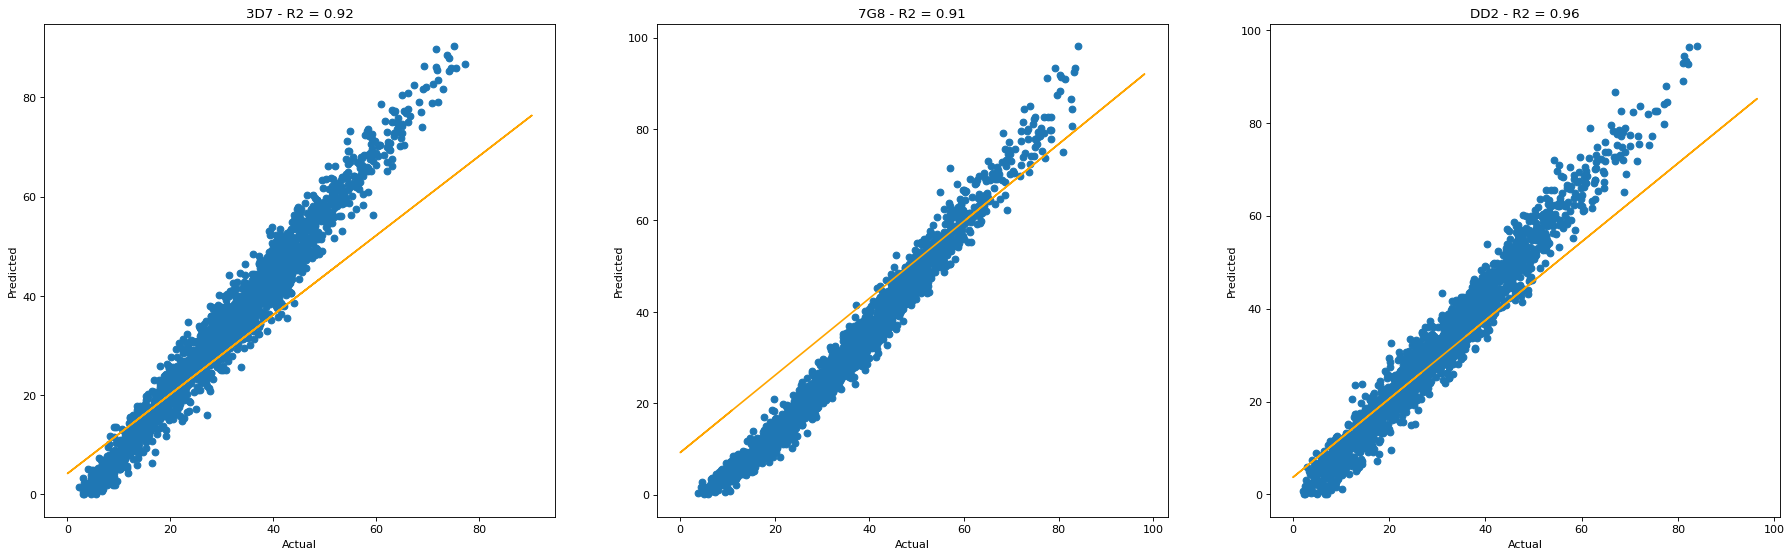

In [16]:
# Data visualisation and performance evaluation
import pandas as pd
from scipy.stats import linregress
from sklearn.metrics import r2_score

df_predict = pd.DataFrame(predict_array)
df_actual = pd.DataFrame(valid_prob_lists)

# Setup the headers
df_predict.columns = ["col_3D7", "col_7G8", "col_DD2"]
df_actual.columns = ["col_3D7", "col_7G8", "col_DD2"]

print(df_predict)
print(df_actual)

plt.figure(figsize=(28, 8), dpi=80)
plt.subplot(1, 3, 1)
r2 = r2_score(df_actual.col_3D7, df_predict.col_3D7)
(m_1, b_1) = np.polyfit(df_actual.col_3D7, df_predict.col_3D7, 1)
yp_1 = np.polyval([m_1, b_1], df_actual.col_3D7)
plt.plot(df_actual.col_3D7, yp_1, color='orange')
plt.title('3D7 - R2 = {r2_score}'.format(r2_score=round(r2,2)))
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.scatter(df_predict.col_3D7, df_actual.col_3D7)

plt.subplot(1, 3, 2)
r2 = r2_score(df_actual.col_7G8, df_predict.col_7G8)
(m_2, b_2) = np.polyfit(df_actual.col_7G8, df_predict.col_7G8, 1)
yp_2 = np.polyval([m_2, b_2], df_actual.col_7G8)
plt.plot(df_actual.col_7G8, yp_2, color='orange')
plt.title('7G8 - R2 = {r2_score}'.format(r2_score=round(r2,2)))
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.scatter(df_predict.col_7G8, df_actual.col_7G8)


plt.subplot(1, 3, 3)
(m_3, b_3) = np.polyfit(df_actual.col_DD2, df_predict.col_DD2, 1)
yp_3 = np.polyval([m_3, b_3], df_actual.col_DD2)
r2 = r2_score(yp_3, df_predict.col_DD2)
plt.plot(df_actual.col_DD2, yp, color='orange')
plt.title('DD2 - R2 = {r2_score}'.format(r2_score=round(r2,2)))
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.scatter(df_predict.col_DD2, df_actual.col_DD2)